In [88]:
import pandas as pd
import numpy as np
import random

url = "Dataset_All.csv"

df = pd.read_csv(url)

index = df['overlapping.F1.mean'].index[df['overlapping.F1.mean'].apply(np.isnan)]

df.iloc[index,7] = 0.999207

df = df.dropna(axis='columns')



df

,Unnamed: 0,encoding,file,scenario,size,anomaly,impact,overlapping.F1.mean,overlapping.F2.mean,overlapping.F3.mean,...,linearity.L3.mean,dimensionality.T2,dimensionality.T3,dimensionality.T4,balance.C1,balance.C2,network.Density,network.ClsCoef,network.Hubs.mean,network.Hubs.sd
0,2,countervectorizer,scenario1_1000_all_0.05.csv,scenario1,1000,all,0.05,0.929791,0.000000e+00,0.847435,...,0.055945,0.046,0.005,0.108696,0.164959,0.928425,0.969221,0.469923,0.817004,0.342494
1,4,countervectorizer,scenario1_1000_all_0.1.csv,scenario1,1000,all,0.10,0.933832,0.000000e+00,0.900145,...,0.086905,0.042,0.006,0.142857,0.258700,0.871819,0.969283,0.486679,0.816720,0.340030
2,6,countervectorizer,scenario1_1000_all_0.15.csv,scenario1,1000,all,0.15,0.953212,4.761905e-02,0.902908,...,0.071276,0.062,0.007,0.112903,0.343633,0.808494,0.975453,0.578261,0.829344,0.338811
3,8,countervectorizer,scenario1_1000_all_0.2.csv,scenario1,1000,all,0.20,0.952529,9.523810e-02,0.913926,...,0.058321,0.061,0.007,0.114754,0.431579,0.730560,0.978877,0.535255,0.865658,0.284432
4,10,countervectorizer,scenario1_1000_attribute_0.05.csv,scenario1,1000,attribute,0.05,0.999739,1.000000e+00,1.000000,...,0.041000,0.022,0.005,0.227273,0.228364,0.923270,0.967401,0.523969,0.820082,0.320730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1369,tfidfvectorizer,scenario5_1000_rework_0.2.csv,scenario5,1000,rework,0.20,0.998875,2.726069e-18,0.674000,...,0.019000,0.103,0.011,0.106796,0.725910,0.524220,0.935193,0.553024,0.858977,0.258824
1396,1379,tfidfvectorizer,scenario5_1000_skip_0.05.csv,scenario5,1000,skip,0.05,0.997926,0.000000e+00,0.910000,...,0.000000,0.103,0.010,0.097087,0.273514,0.901603,0.908408,0.625606,0.792881,0.322858
1397,1389,tfidfvectorizer,scenario5_1000_skip_0.1.csv,scenario5,1000,skip,0.10,0.998737,7.067615e-05,0.863000,...,0.002000,0.103,0.011,0.106796,0.419556,0.815797,0.915387,0.585612,0.808480,0.314021
1398,1399,tfidfvectorizer,scenario5_1000_skip_0.15.csv,scenario5,1000,skip,0.15,0.998201,1.745865e-05,0.909000,...,0.007000,0.103,0.012,0.116505,0.592042,0.675318,0.917185,0.581416,0.806848,0.330178


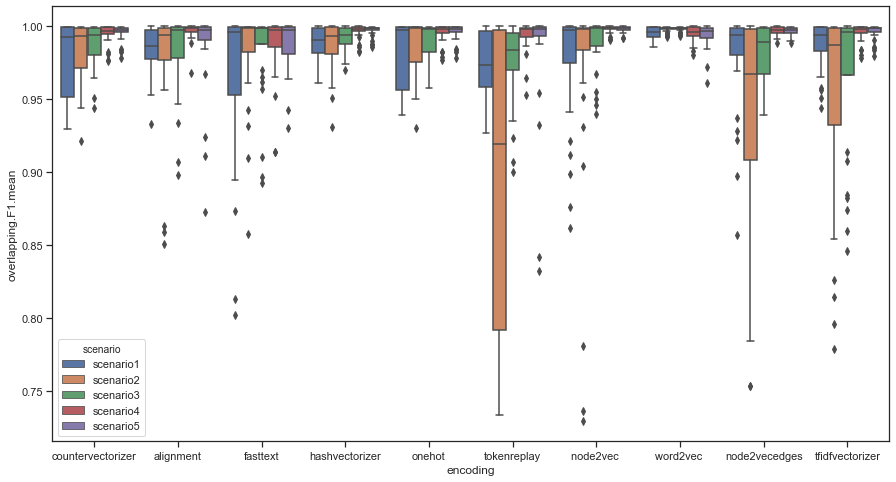

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(15,8))
#ax = sns.boxplot(x="encoding", y="overlapping.F1.mean", hue="scenario", data=df[df.scenario == "scenario1"])
ax = sns.boxplot(x="encoding", y="overlapping.F1.mean", hue="scenario", data=df)




/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


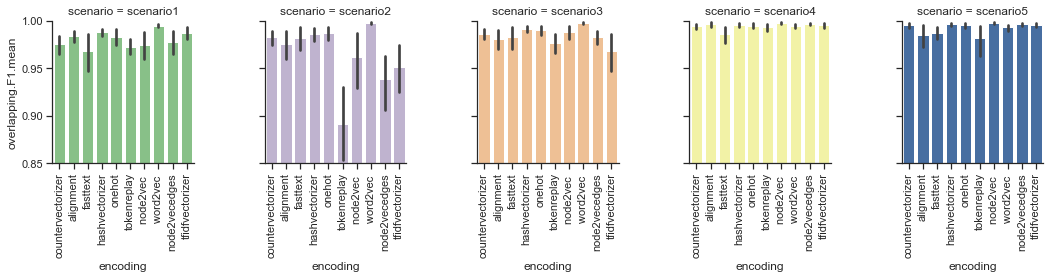

In [181]:
g = sns.FacetGrid(df, col="scenario", hue="scenario", palette="Accent")
g.map(sns.barplot, "encoding", "overlapping.F1.mean");
g.set_xticklabels(rotation=90)
g.set(ylim=(0.85, 1))

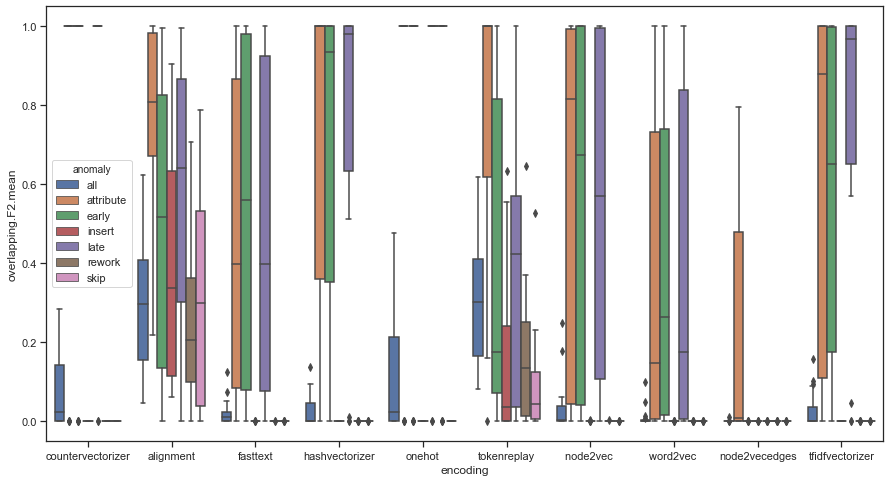

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(15,8))
ax = sns.boxplot(x="encoding", y="overlapping.F2.mean", hue="anomaly", data=df, )

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


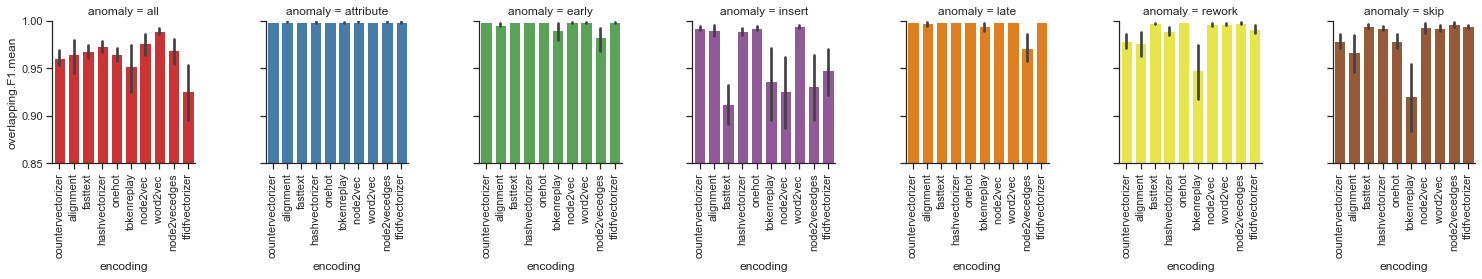

In [186]:
g = sns.FacetGrid(df, col="anomaly", hue="anomaly", palette="Set1")
g.map(sns.barplot, "encoding", "overlapping.F1.mean");
g.set_xticklabels(rotation=90)
g.set(ylim=(0.85, 1))

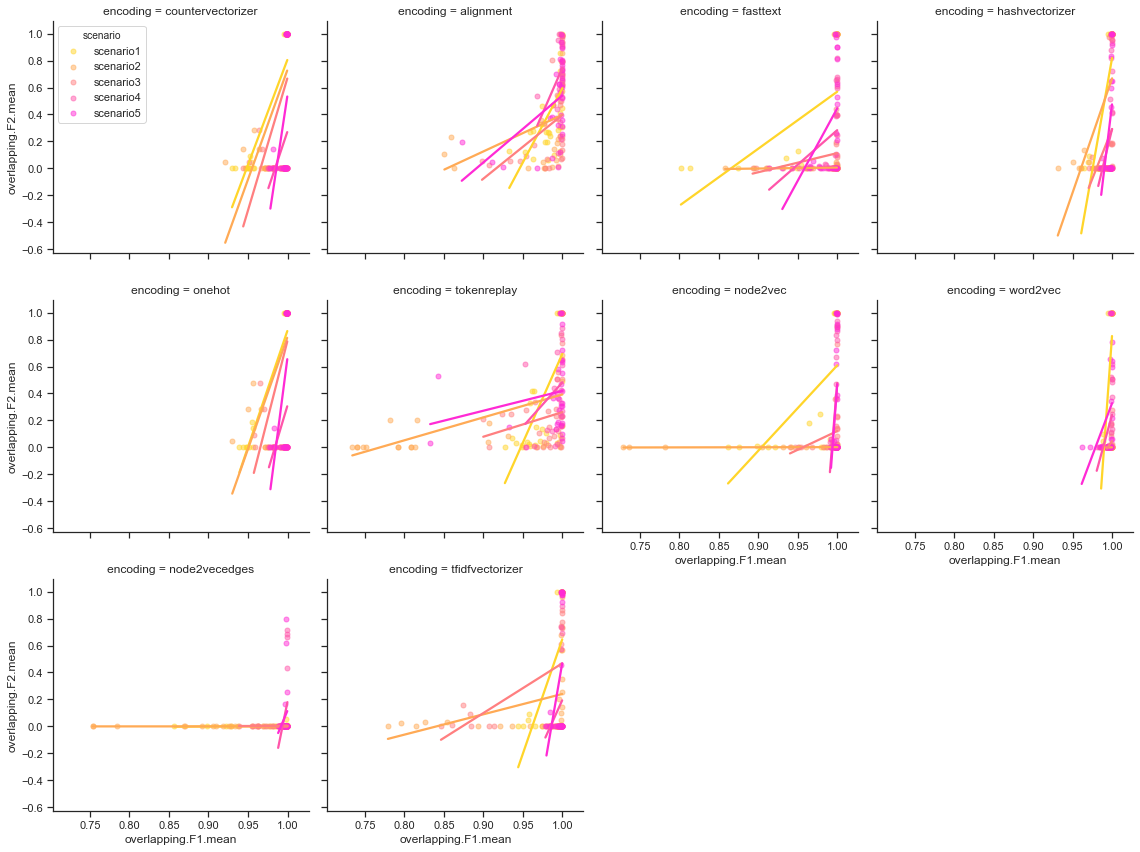

In [209]:
sns.lmplot(x="overlapping.F1.mean", y="overlapping.F2.mean", col="encoding", hue="scenario", 
           data=df, 
           col_wrap=4, ci=None, palette="spring_r", height=4,
           scatter_kws={"s": 25, "alpha": 0.5} ,legend_out = False)


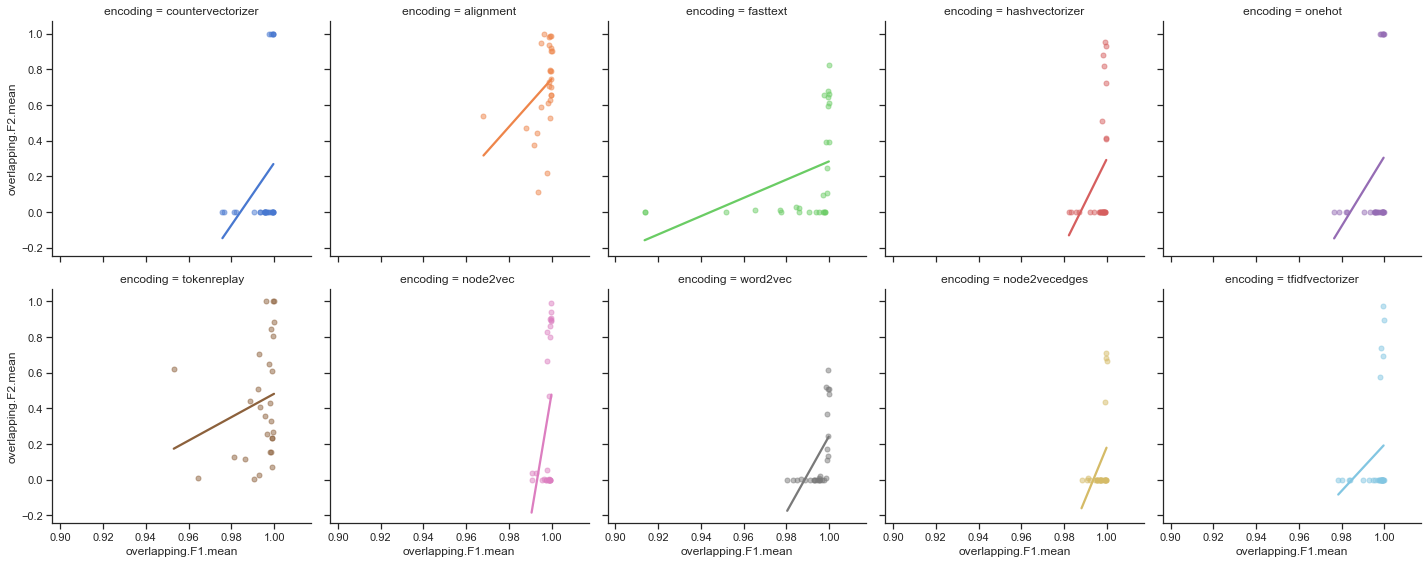

In [112]:
sns.lmplot(x="overlapping.F1.mean", y="overlapping.F2.mean", col="encoding", hue="encoding", 
           data=df[df.scenario == "scenario4"],
           col_wrap=5, ci=None, palette="muted", height=4,
           scatter_kws={"s": 25, "alpha": 0.5})


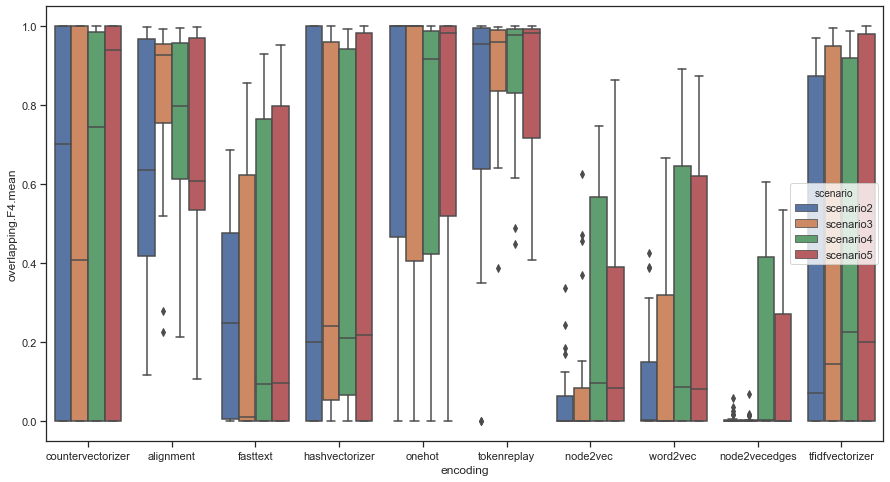

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(15,8))
ax = sns.boxplot(x="encoding", y="overlapping.F4.mean", hue="scenario", data=df[df.scenario != "scenario1"])
#ax = sns.boxplot(x="encoding", y="overlapping.F4.mean", hue="scenario", data=df)




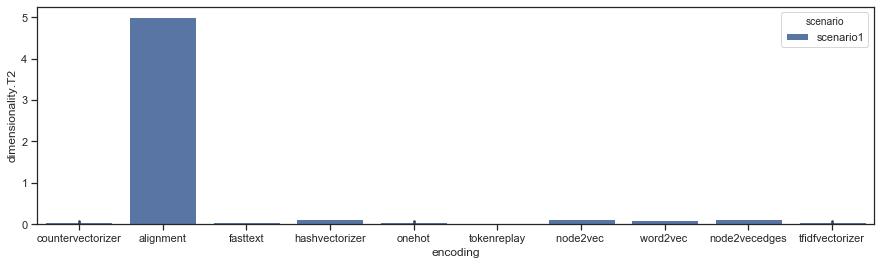

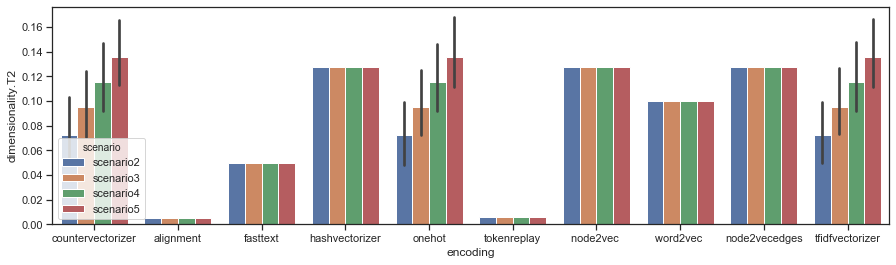

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(15,4))
ax = sns.barplot(x="encoding", y="dimensionality.T2", hue="scenario", data=df[df.scenario == "scenario1"])
fig= plt.figure(figsize=(15,4))
ax = sns.barplot(x="encoding", y="dimensionality.T2", hue="scenario", data=df[df.scenario != "scenario1"])




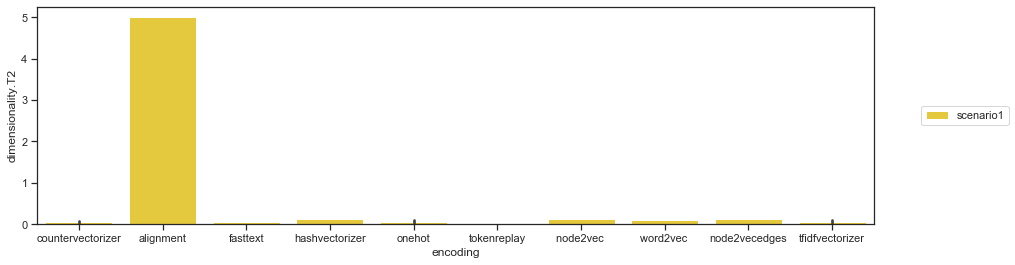

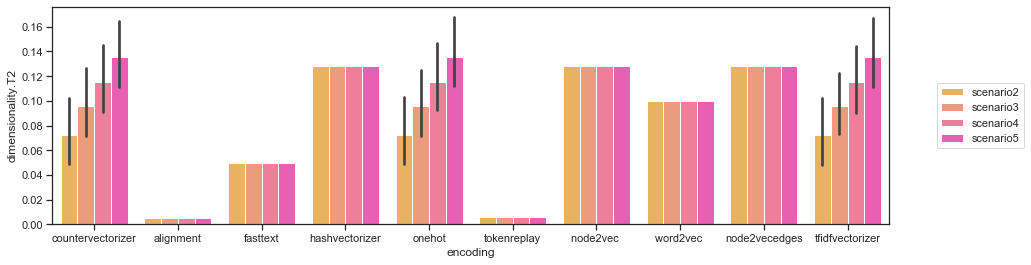

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("spring_r")


fig= plt.figure(figsize=(15,4))
ax = sns.barplot(x="encoding", y="dimensionality.T2", hue="scenario", data=df[df.scenario == "scenario1"],
                palette=colors)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
fig= plt.figure(figsize=(15,4))
ax = sns.barplot(x="encoding", y="dimensionality.T2", hue="scenario", data=df[df.scenario != "scenario1"],
                palette=colors[1:])
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)




/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x288 with 0 Axes>

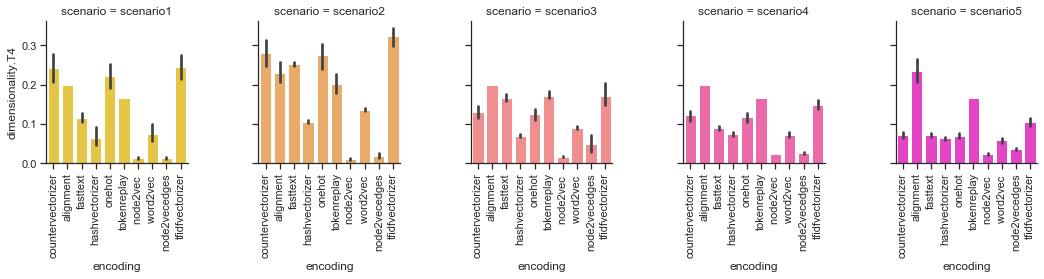

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
#f, axes = plt.subplots(1, 3)
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario1"], ax=axes[0])
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario2"], ax=axes[1])
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario3"], ax=axes[2])

g = sns.FacetGrid(df, col="scenario", hue="scenario",palette="spring_r")
g.map(sns.barplot, "encoding", "dimensionality.T4");
g.set_xticklabels(rotation=90)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x288 with 0 Axes>

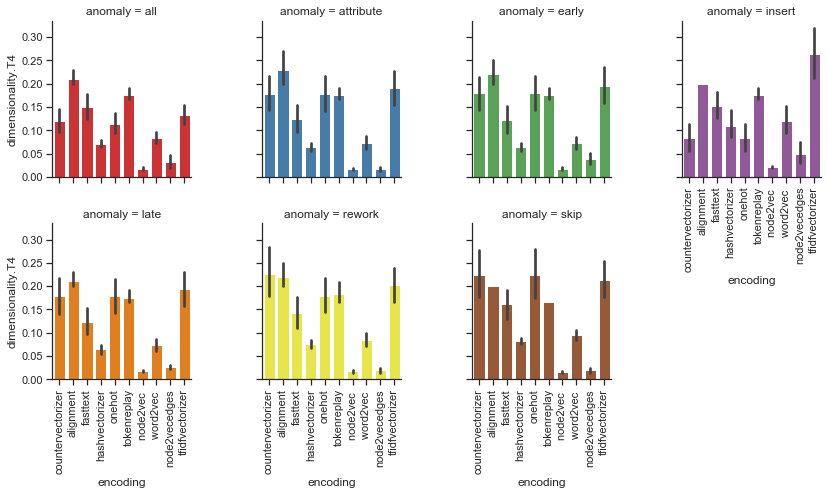

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
#f, axes = plt.subplots(1, 3)
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario1"], ax=axes[0])
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario2"], ax=axes[1])
#sns.barplot(x="encoding", y="dimensionality.T4", hue="scenario", data=df[df.scenario == "scenario3"], ax=axes[2])


g = sns.FacetGrid(df, col="anomaly", hue="anomaly", col_wrap=4, palette="Set1")
g.map(sns.barplot, "encoding", "dimensionality.T4");
g.set_xticklabels(rotation=90)